# Problem 1
`What is the difference between a pandas Series and a DataFrame?`

Series is kind of a pandas version of a 1D array, while DataFrame is a collection of Series.
Series stores a list of values in one attribute, while DataFrame has several columns to serve with different attributes.

# Problem 2

In [1]:
import pandas as pd

data = {'width':[(i+1)*5 for i in range(5)], 'height':[(i+4)*6 for i in range(5)]}
data['width'].append(data['width'][-1])
data['height'].append(data['height'][-1])
data['size'] = [w*h for w,h in zip(data['width'],data['height'])]
sampleDf = pd.DataFrame(data, index = [chr(i+97) for i in range(6)])

print('--- Sample DataFrame ---')
print(sampleDf,'\n')
print('--- Statistic Summary ---')
print(sampleDf.describe())

--- Sample DataFrame ---
   width  height  size
a      5      24   120
b     10      30   300
c     15      36   540
d     20      42   840
e     25      48  1200
f     25      48  1200 

--- Statistic Summary ---
           width     height         size
count   6.000000   6.000000     6.000000
mean   16.666667  38.000000   700.000000
std     8.164966   9.797959   456.420858
min     5.000000  24.000000   120.000000
25%    11.250000  31.500000   360.000000
50%    17.500000  39.000000   690.000000
75%    23.750000  46.500000  1110.000000
max    25.000000  48.000000  1200.000000


# Problem 3

In [2]:
print('With \'.\' -- Select the whole column\n')
print('Example: sampleDf.width')
print(sampleDf.width)

print('\n'+'-'*40+'\n')
print('With [] -- Select columns or rows\n')
print('Example: sampleDf[[\'width\',\'size\']]')
print(sampleDf[['width','size']])
print('\nExample: sampleDf[3:5]')
print(sampleDf[3:5])
print('\nExample: sampleDf[\'b\':\'d\']')
print(sampleDf['b':'d'])

print('\n'+'-'*40+'\n')
print('With \'iloc\' -- Select by index number\n')
print('Example: sampleDf.iloc[1:3,:2]')
print(sampleDf.iloc[1:3,:2])

print('\n'+'-'*40+'\n')
print('With \'loc\' -- Select by name')
print('\nExample: sampleDf.loc[\'b\':\'f\':2,\'height\':\'size\']')
print(sampleDf.loc['b':'f':2,'height':'size'])


With '.' -- Select the whole column

Example: sampleDf.width
a     5
b    10
c    15
d    20
e    25
f    25
Name: width, dtype: int64

----------------------------------------

With [] -- Select columns or rows

Example: sampleDf[['width','size']]
   width  size
a      5   120
b     10   300
c     15   540
d     20   840
e     25  1200
f     25  1200

Example: sampleDf[3:5]
   width  height  size
d     20      42   840
e     25      48  1200

Example: sampleDf['b':'d']
   width  height  size
b     10      30   300
c     15      36   540
d     20      42   840

----------------------------------------

With 'iloc' -- Select by index number

Example: sampleDf.iloc[1:3,:2]
   width  height
b     10      30
c     15      36

----------------------------------------

With 'loc' -- Select by name

Example: sampleDf.loc['b':'f':2,'height':'size']
   height  size
b      30   300
d      42   840
f      48  1200


# Problem 4
`What is sorting for categorical variables in pandas DataFrame based on?`

It's based on the order provided when defining a Pandas Categorical

# Problem 5

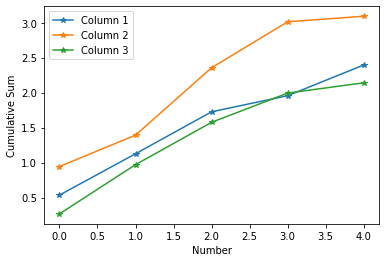

In [3]:
import matplotlib.pyplot as plt
import numpy as np

randSampleDf = pd.DataFrame(np.random.rand(5,3), columns = ['Column %d'%i for i in range(1,4)])
randSampleDf.cumsum()
plt.plot(randSampleDf.cumsum(), '*-',label = randSampleDf.columns)
plt.legend()
plt.xlabel('Number')
plt.ylabel('Cumulative Sum')
plt.show()

# Problem 6

In [4]:
df = pd.DataFrame({'Name': 'Alex Tom Steve Clarke Sarah'.split(),
                   'Age': [23, 18, 30, 20, 45],
                   'weight': [151, 140, 180, 124, 120],
                   'Gender': ['Male'] * 3 + ['Female'] * 2})

ages = df.sort_values(by = 'weight', ascending=False)[['Age','Gender']]
ages

,Age,Gender
2,30,Male
0,23,Male
1,18,Male
3,20,Female
4,45,Female


# Problem 7

In [5]:
meanWeight = df.describe()['weight'].loc['mean']
df.loc[df['weight'] > 150, 'weight'] = meanWeight
df

,Name,Age,weight,Gender
0,Alex,23,143,Male
1,Tom,18,140,Male
2,Steve,30,143,Male
3,Clarke,20,124,Female
4,Sarah,45,120,Female


# Problem 8

In [6]:
df = pd.DataFrame({'Animal': 'cat dog dog dog fish'.split(),
                   'weight': [8, 10, 12, 11, 2]})

for col in df.columns:
    df['count_'+col] = df[col].map(df[col].value_counts())

df

,Animal,weight,count_Animal,count_weight
0,cat,8,1,1
1,dog,10,3,1
2,dog,12,3,1
3,dog,11,3,1
4,fish,2,1,1
